Implementation of gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Gradient descent for 2 functions:

$f(x) = x^2-7*x+10$

$f'(x) = 2*x+7 $

$f_2(x) = x^2 + 5*cos(x)$

$f_2'(x) = 2*x -5*sin(x) $

Initializing functions for convenience in individual functions

In [2]:
def f(x):
    return x*x + 3*x +5
def dfdx(x):
    return 2*x + 3
def f2(x):
    return x*x + 5*np.cos(x)
def df2dx(x):
    return 2*x - 5*np.sin(x)

In [24]:
def drawGD(ax,N,lr,xc,f,dfdx,x_plot,draw):
    #fig, ax = plt.subplots()
    print(f'Information about {f}:')

    ax.set_title(f'Number of iterations: {N}, learning rate: {lr}')
    #ax.set_title(f'iter: {N}, lr: {lr}')
    
    #x_plot= np.arange(-11,8,0.01)
    y_plot = [f(x) for x in x_plot]
    ax.plot(x_plot,y_plot)

    print(f'Start position x: {xc}, value of function f(xc): {f(xc)}')

    ax.scatter(xc,f(xc),color='green')

    for _ in range(N):
        x0=xc

        xc=xc-lr*dfdx(xc)

        ax.scatter(xc,f(xc),color='green')
        ax.plot([x0,xc],[f(x0),f(xc)],color='red')

    ax.scatter(xc,f(xc),color='yellow') #final point of descent
    print(f'Final minimum value: {f(xc)}, at position x: {xc}')
    print('-' * 20)
    plt.tight_layout()  # automatically adjusts the layout for better display
    if draw:
        plt.show()

Information about <function f at 0x0000013E5CDD18A0>:
Start position x: -9, value of function f(xc): 59
Final minimum value: 2.7499999999999996, at position x: -1.5000000000000004
--------------------
Information about <function f2 at 0x0000013E74169940>:
Start position x: -5, value of function f(xc): 26.41831092731613
Final minimum value: 1.8842930504921758, at position x: -2.1253451913874697
--------------------


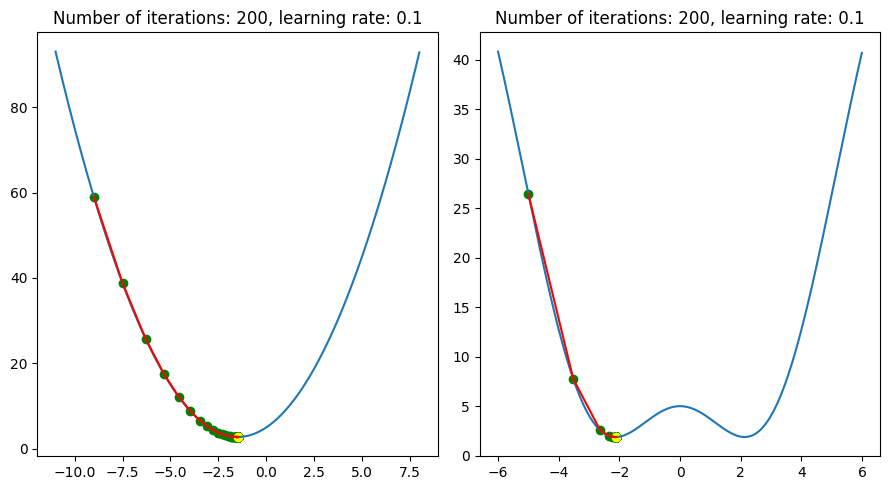

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))  # create a grid of 1x2 charts
x_plot_f1= np.arange(-11,8,0.01)#for correct display of f1
x_plot_f2=np.arange(-6,6,0.01)#for correct display of f2

drawGD(ax=ax[0],N=200,lr=0.1,xc=-9,f=f,dfdx=dfdx,x_plot=x_plot_f1,draw=False)
drawGD(ax=ax[1],N=200,lr=0.1,xc=-5,f=f2,dfdx=df2dx,x_plot=x_plot_f2,draw=True)

#xc- initial value

Analysis of the influence of learning rate on the convergence to a minimum of a function

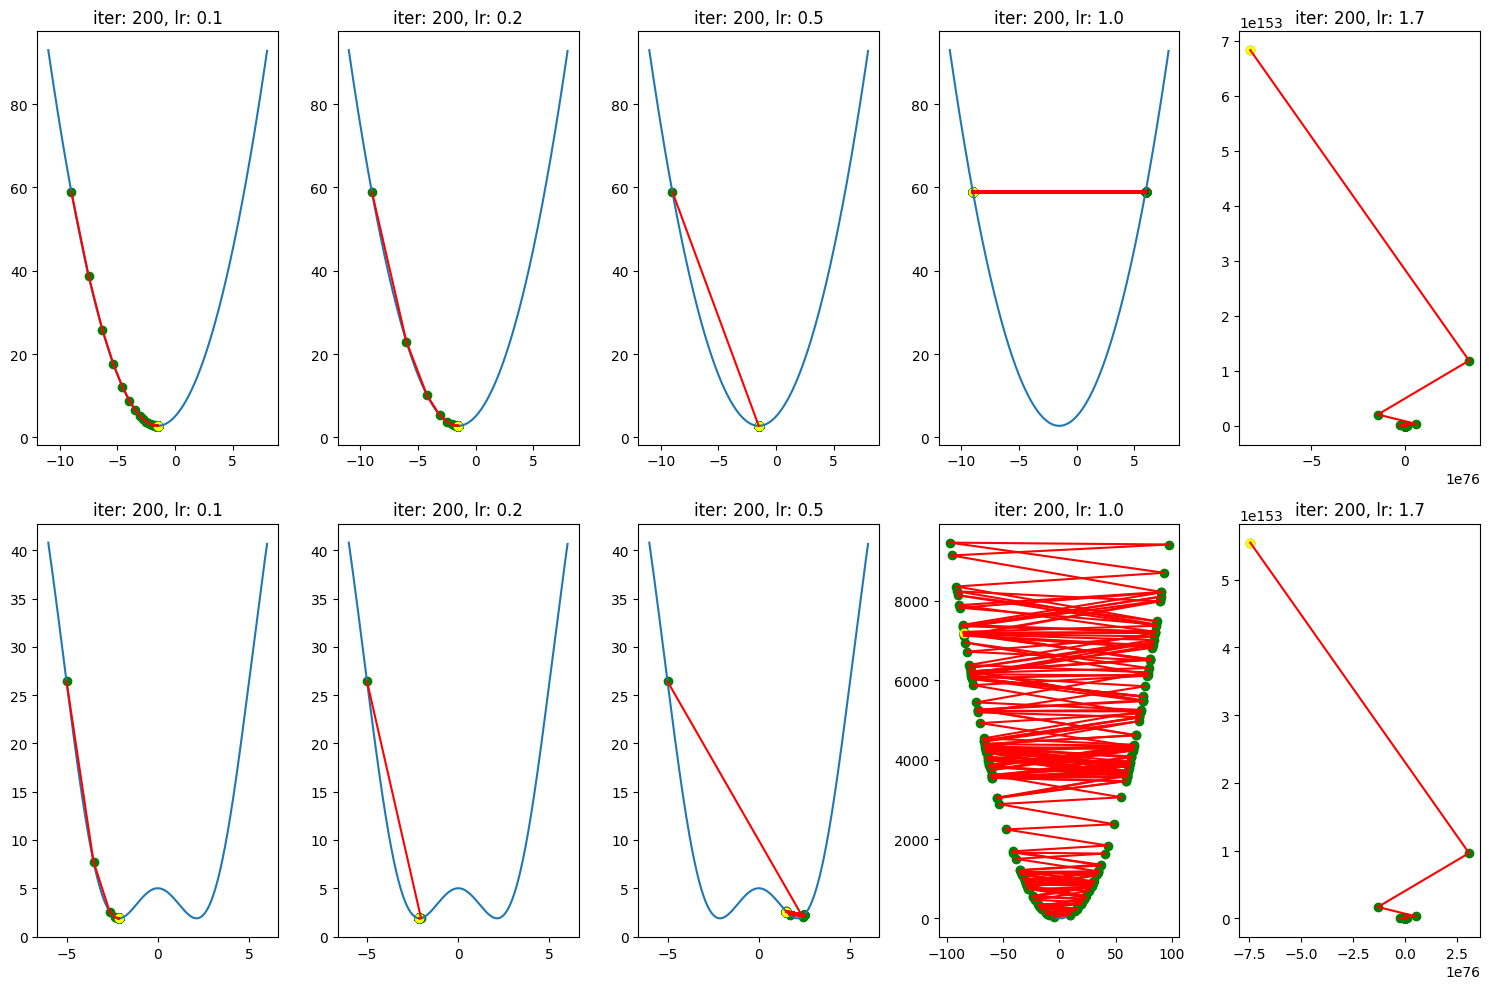

In [23]:
fig, ax = plt.subplots(2, 5, figsize=(15,  10))  # create a grid of 1x5 charts
for i in range(0,5):
    lr=(i*i+1)/10

    x_plot_f1= np.arange(-11,8,0.01)#for correct display of f1
    x_plot_f2=np.arange(-6,6,0.01)#for correct display of f2
    
    drawGD(ax=ax[0][i],N=200,lr=lr,xc=-9,f=f,dfdx=dfdx,x_plot=x_plot_f1,draw=False)
    drawGD(ax=ax[1][i],N=200,lr=lr,xc=-5,f=f2,dfdx=df2dx,x_plot=x_plot_f2,draw=False)
plt.tight_layout()
plt.show()

Employing learning rates exceeding 0.2 presents difficulties in attaining the minimum function, let alone values surpassing 1. Elevated learning rates hinder the gradual approach to the minimum, often resulting in divergent movements away from it.

In [25]:
from copy import deepcopy
from tqdm import tqdm

import seaborn

In [38]:
std_error =30 #variance to generate random data
sample_size=1000

weight0,weight1= 1, 15 # weight of model

x=np.random.randn(sample_size)#standard normal distribution

func_y = lambda x: weight0 + weight1*x

y=func_y(x) + std_error*np.random.randn(sample_size)

In [39]:
def visual_sample(x,y):
    x_plot= np.linspace(x.min(),x.max(),1000)
    y_plot = func_y(x_plot)

    fig = plt.figure(figsize=(10,7))
    plt.scatter(x,y,alpha=0.25)
    plt.plot(x_plot,y_plot,"r--", label=f'{weight0} + {weight1}x')
    plt.xlim(x.min(),x.max())
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')

    plt.show()

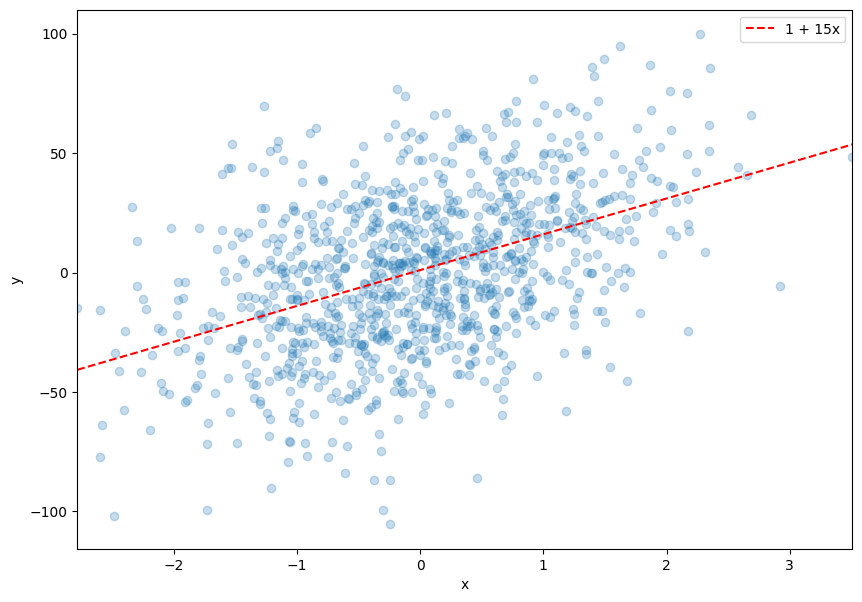

In [40]:
visual_sample(x,y)

In [59]:
def calculate_predictions(weight0,weight1,X):
    return weight0+weight1*X

def calculate_loss(weight0,weight1,X,y):
    weight0 = np.atleast_3d(np.asarray(weight0))
    weight1 = np.atleast_3d(np.asarray(weight1))

    y_pred = calculate_predictions(weight0,weight1,X)
    loss= np.average((y-y_pred)**2,axis=2)/2 #arrays are three-dimensional, and MSE is calculated along the third axis.

    return loss
def gradien_descent_step(weight,X,y,lr):
    n=len(y)
    y_pred=calculate_predictions(weight[0],weight[1],X)

    update_weight=deepcopy(weight)
    update_weight[0] -= lr/n * np.sum((y_pred-y))
    update_weight[1] -= lr/n * np.sum((y_pred-y)*X)

    return update_weight

def plot_gradien_descent(loss_history,weight_history,X,y):

    fig = plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.scatter(range(len(loss_history)),loss_history)
    plt.xlabel('Number of iter')
    plt.ylabel("weight")

    plt.subplot(223)
    plt.scatter(x,y,alpha=0.15)
    x_plot = np.linspace(-3,3,500)
    for num,weight in enumerate(weight_history):
        y_plot=calculate_predictions(weight[0],weight[1],x_plot)
        if num==0:
            plt.plot(x_plot,y_plot,color='g',label='Baseline',linewidth=4)
        if num==len(weight_history)-1:
            plt.plot(x_plot,y_plot,c='r',label='Result Work',linewidth=4)
        else:
            plt.plot(x_plot,y_plot,'--y',alpha=0.5)    
    plt.xlim(x_plot.min(),x_plot.max())
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_plot,func_y(x_plot),c='black',label='First line',linewidth=3)
    plt.legend(loc='best')

    plt.subplot(222)
    x_plot=range(len(loss_history)+1)
    plt.scatter(x_plot,[weight[0] for weight in weight_history],label='weight_0')
    plt.scatter(x_plot,[weight[1] for weight in weight_history], label='weight_1')
    plt.xlabel('Number of iter')
    plt.ylabel('weight')
    plt.legend(loc='best')

    plt.subplot(224)
    plot_loss_function(X,y,weight_history)

def plot_loss_function(X,y,weight_history):
    weight0 = [weight[0] for weight in weight_history]
    weight1 = [weight[1] for weight in weight_history]

    weight0_grid = np.linspace(-25,25,200)
    weight1_grid = np.linspace(-25,25,200)
    loss_grid = calculate_loss(weight0_grid[np.newaxis,:,np.newaxis],
                               weight1_grid[:,np.newaxis,np.newaxis],X,y)
    X, Y = np.meshgrid(weight0_grid,weight1_grid)

    weight0,weight1 = weight_history[-1]
    plt.scatter([weight0]*2, [weight1]*2,s=[50,0], c= ['k','w'])
    contours=plt.contour(X,Y,loss_grid,30)
    plt.clabel(contours)

    for it in range(1,len(weight_history)):
        plt.annotate(
            '', xy=weight_history[it], xytext=weight_history[it-1],
            arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 2},
            va='center', ha='center'
        )
    
    plt.scatter(*zip(*weight_history),color='black',s=40,lw=0)
    plt.xlim(weight0_grid.min(), weight0_grid.max())
    plt.ylim(weight1_grid.min(), weight1_grid.max())
    plt.xlabel('weight_0', size=15)
    plt.ylabel('weight_1', size=15)
    plt.title('Loss function', size=15)

In [60]:
n_iter, lr = 100,0.5
weight_history, loss_history = [100*np.random.rand(2)],[]

for it in tqdm(range(n_iter)):
    last_weight = weight_history[-1]
    current_weight=gradien_descent_step(weight=last_weight,X=x,y=y,lr=lr)
    weight_history.append(current_weight)
    loss_history.append(calculate_loss(current_weight[0],current_weight[1],X=x,y=y))

100%|██████████| 100/100 [00:00<00:00, 12496.81it/s]


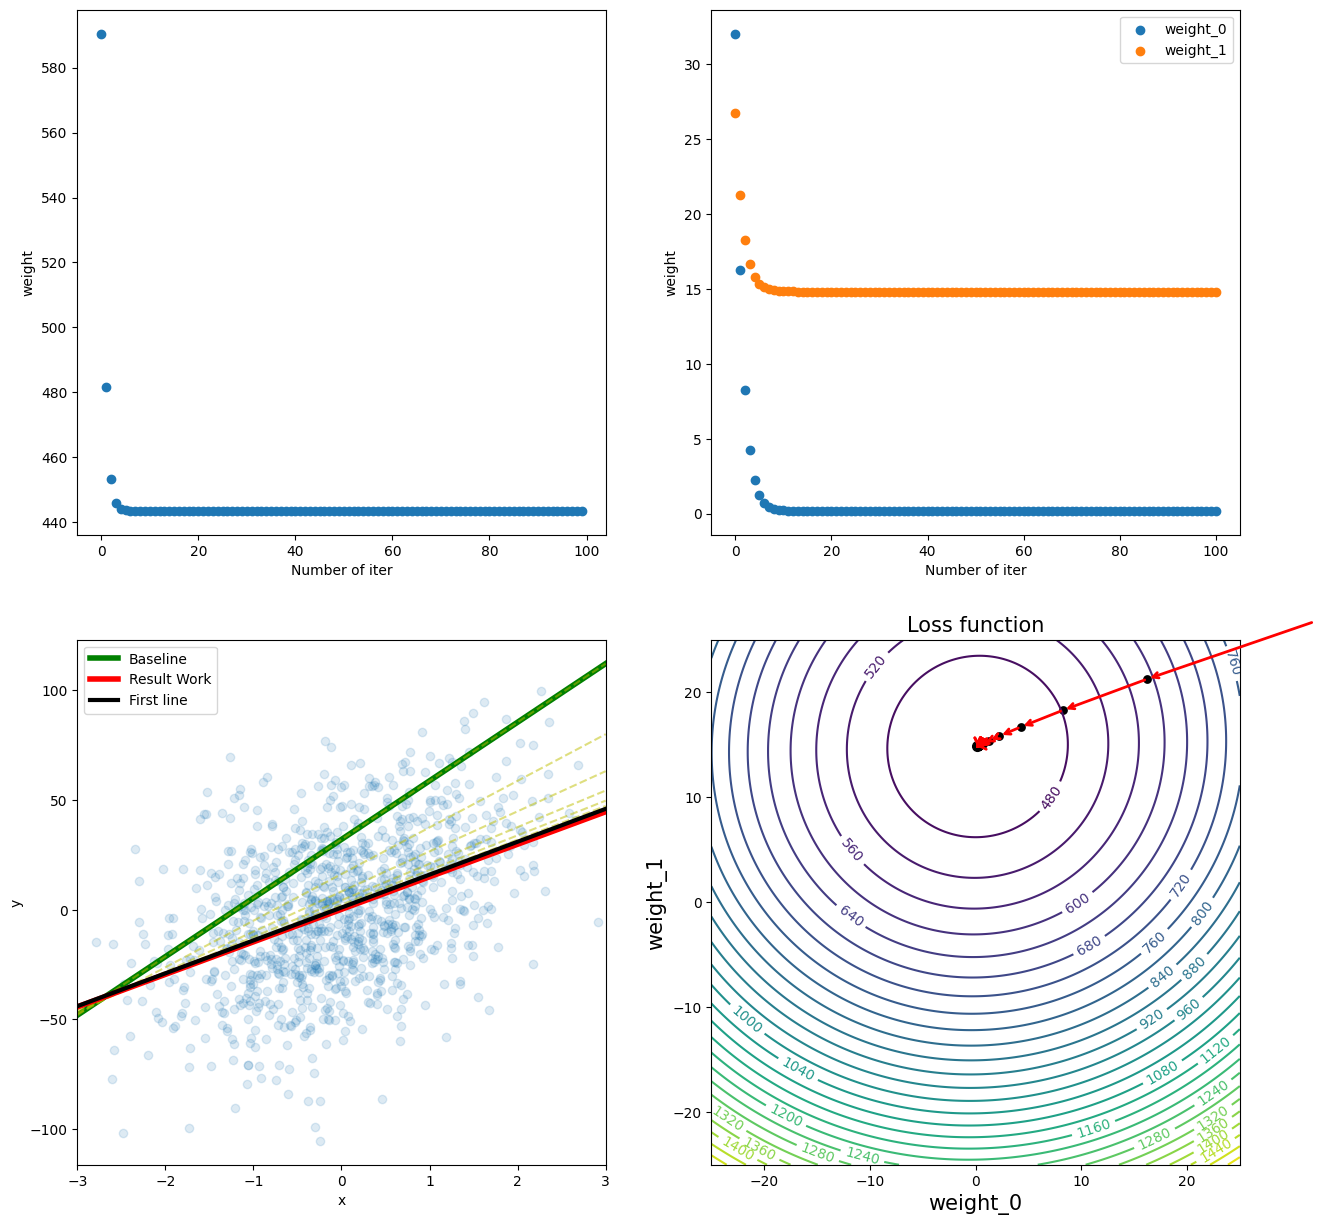

In [61]:
plot_gradien_descent(loss_history=loss_history,weight_history=weight_history,X=x,y=y)